# **Import Lib**

In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

In [ ]:
! pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=07ac3a0ba95abf822391d6b22d15c9570000ce29242bb31413cb26ae1e15e908
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


# **Get and Preprocess Data**

In [ ]:
!wget "https://raw.githubusercontent.com/Thanksun/Dataset/main/Dataset_Gold.csv"

--2023-07-13 13:52:05--  https://raw.githubusercontent.com/Thanksun/Dataset/main/Dataset_Gold.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159830 (156K) [text/plain]
Saving to: ‘Dataset_Gold.csv’

Dataset_Gold.csv    100%[===================>] 156.08K  --.-KB/s    in 0.03s   

2023-07-13 13:52:05 (5.78 MB/s) - ‘Dataset_Gold.csv’ saved [159830/159830]



In [1]:
# Dùng thư viện yfinance để tải dataset
import yfinance as yf

start_date = '2015-01-01'
end_date = '2023-07-15'
symbol = 'GC=F' #  Gold Aug 23.

data = yf.download(symbol, start=start_date, end=end_date)
data.to_csv('Dataset_Gold.csv')

[*********************100%***********************]  1 of 1 completed


In [2]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,1184.000000,1194.500000,1169.500000,1186.000000,1186.000000,138
2015-01-05,1180.300049,1206.900024,1180.099976,1203.900024,1203.900024,470
2015-01-06,1203.500000,1220.000000,1203.500000,1219.300049,1219.300049,97
2015-01-07,1219.199951,1219.199951,1210.599976,1210.599976,1210.599976,29
2015-01-08,1207.000000,1215.699951,1206.300049,1208.400024,1208.400024,92
...,...,...,...,...,...,...
2023-07-10,1923.599976,1926.099976,1912.300049,1925.000000,1925.000000,269
2023-07-11,1925.000000,1937.000000,1924.199951,1931.300049,1931.300049,142
2023-07-12,1932.300049,1958.000000,1932.199951,1956.199951,1956.199951,132


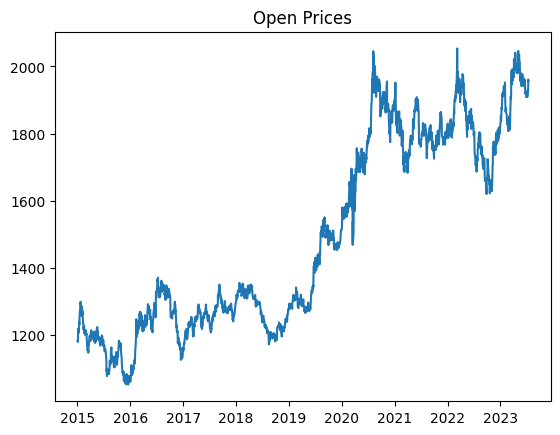

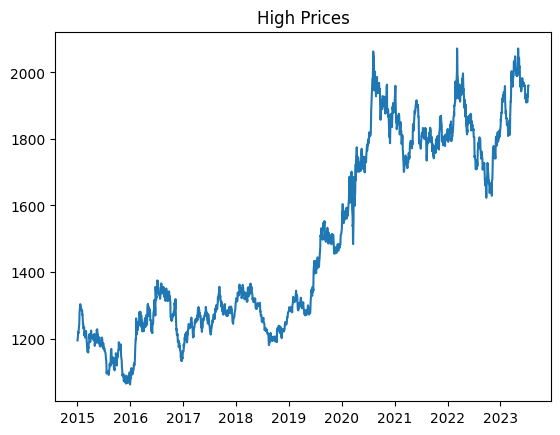

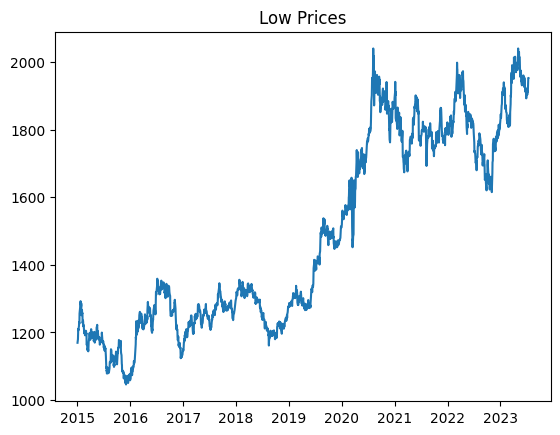

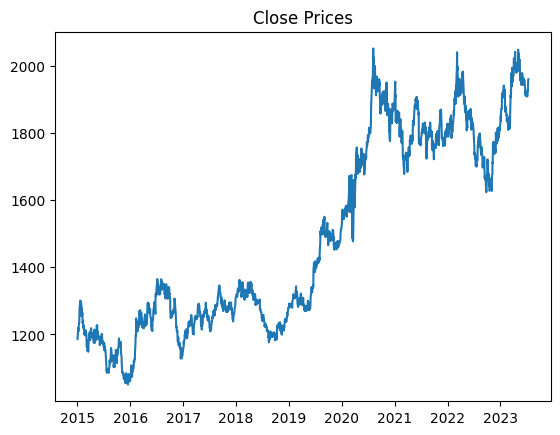

In [4]:
import matplotlib.pyplot as plt
plt.plot(data['Open'])
plt.title('Open Prices')
plt.show()

plt.plot(data['High'])
plt.title('High Prices')
plt.show()

plt.plot(data['Low'])
plt.title('Low Prices')
plt.show()

plt.plot(data['Close'])
plt.title('Close Prices')
plt.show()

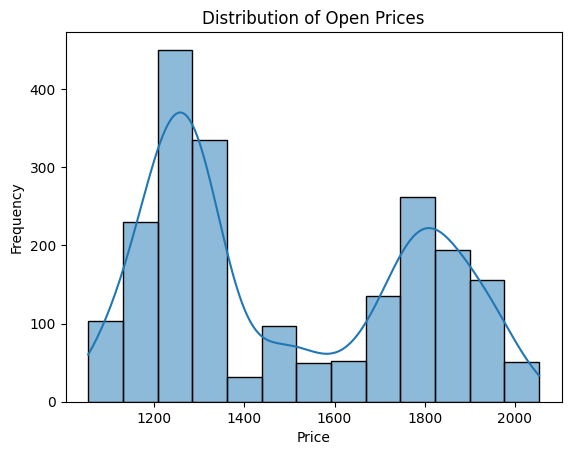

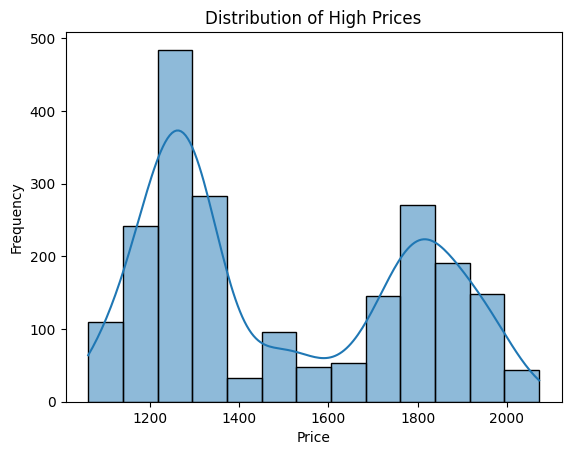

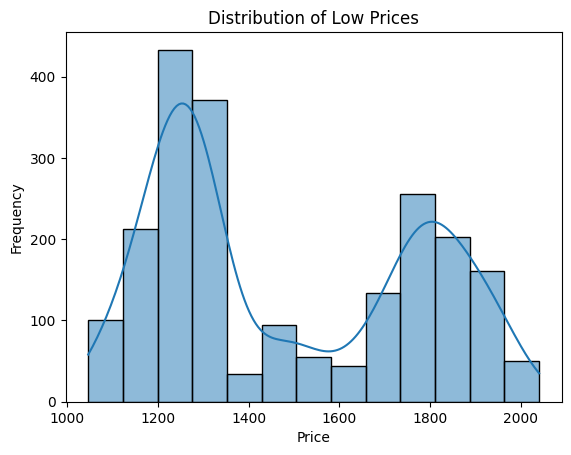

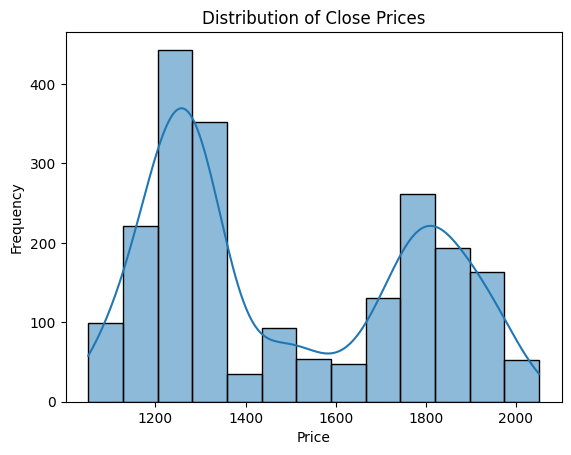

In [5]:
import seaborn as sns

# Lấy dữ liệu từ dataset và chuyển đổi thành danh sách các giá trị
open_prices = data['Open'].tolist()

# Vẽ biểu đồ phân phối cho giá trị Open
sns.histplot(open_prices, kde=True)
plt.title('Distribution of Open Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Lấy dữ liệu từ dataset và chuyển đổi thành danh sách các giá trị
open_prices = data['High'].tolist()

# Vẽ biểu đồ phân phối cho giá trị Open
sns.histplot(open_prices, kde=True)
plt.title('Distribution of High Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Lấy dữ liệu từ dataset và chuyển đổi thành danh sách các giá trị
open_prices = data['Low'].tolist()

# Vẽ biểu đồ phân phối cho giá trị Open
sns.histplot(open_prices, kde=True)
plt.title('Distribution of Low Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Lấy dữ liệu từ dataset và chuyển đổi thành danh sách các giá trị
open_prices = data['Close'].tolist()

# Vẽ biểu đồ phân phối cho giá trị Open
sns.histplot(open_prices, kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# load and preprocess the dataset:
def preprocessData(df, list_cols):
    for col in list_cols:
        df = df.loc[df[col] != '-']
    return df

def convert_col_into_float(df, list_cols):
    for col in list_cols:
        df[col] = df[col].astype(str)
        df[col] = df[col].str.replace(',', '')
        df[col] = df[col].astype(np.float32)
    return df

df = pd.read_csv("/content/Dataset_Gold.csv",
                  index_col='Date',
                  usecols=['Date', 'Open', 'High', 'Low', 'Close'],
                  parse_dates=['Date'],
                  dtype=str)
print(df.head())
list_cols = list(df.columns)
print("dataset variables", list_cols)
df = preprocessData(df, list_cols)
df = convert_col_into_float(df, list_cols)
df = df.iloc[::-1]                              # Lật ngược bảng để nhận được bảng theo thứ tự tăng dần của thời gian
print("--------------------")
print(df.head())
print("--------------------")
data = df.values
data

                         Open                High                 Low  \
Date                                                                    
2015-01-02             1184.0              1194.5              1169.5   
2015-01-05  1180.300048828125  1206.9000244140625  1180.0999755859375   
2015-01-06             1203.5              1220.0              1203.5   
2015-01-07  1219.199951171875   1219.199951171875  1210.5999755859375   
2015-01-08             1207.0   1215.699951171875   1206.300048828125   

                         Close  
Date                            
2015-01-02              1186.0  
2015-01-05  1203.9000244140625  
2015-01-06   1219.300048828125  
2015-01-07  1210.5999755859375  
2015-01-08  1208.4000244140625  
dataset variables ['Open', 'High', 'Low', 'Close']
--------------------
                   Open         High          Low        Close
Date                                                          
2023-07-07  1913.400024  1934.099976  1913.400024  1926.199

array([[1913.4, 1934.1, 1913.4, 1926.2],
       [1909.3, 1910.2, 1903.2, 1908.7],
       [1923.5, 1933.9, 1914.7, 1919.6],
       ...,
       [1203.5, 1220. , 1203.5, 1219.3],
       [1180.3, 1206.9, 1180.1, 1203.9],
       [1184. , 1194.5, 1169.5, 1186. ]], dtype=float32)

In [ ]:
df

,Open,High,Low,Close
Date,,,,
2023-07-07,1913.400024,1934.099976,1913.400024,1926.199951
2023-07-06,1909.300049,1910.199951,1903.199951,1908.699951
2023-07-05,1923.500000,1933.900024,1914.699951,1919.599976
2023-07-03,1917.900024,1929.500000,1917.900024,1921.699951
2023-06-30,1908.599976,1921.099976,1900.599976,1921.099976
...,...,...,...,...
2015-01-08,1207.000000,1215.699951,1206.300049,1208.400024
2015-01-07,1219.199951,1219.199951,1210.599976,1210.599976
2015-01-06,1203.500000,1220.000000,1203.500000,1219.300049


# **Các hàm tạo dataset**

In [ ]:
def split_dataset_into_seq(dataset, start_index=0, end_index=None, history_size=13, step=1):
    '''split the dataset to have sequence of observations of length history size'''
    """
         Tạo các chuỗi đầu vào dataset - Các vector
         Ta dự đoán 4 giá trị Open, High, Low, CLose trên 4 giá trị Open, High, Low, Close trước đó
         History size mặc định là 13
         Tạo các sequence gồm chuỗi vector [Open, High, Low, Close] với history_size ngày trước đó
         Việc tạo ra các seq để phục vụ cho việc train Transfomer model.
    """

    data = []
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset)
    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])
    return np.array(data)

In [ ]:
def split_dataset(data, TRAIN_SPLIT=0.7, VAL_SPLIT=0.5, save_path=None):
    '''split the dataset into train, val and test splits'''
    """
          Normalize data để có thể biểu diễn data dễ dàng hơn cũng như đơn giản cho việc train model.
          SỬ dụng số liệu chưa normalize sẽ khiến việc tính toán khó khăn khi cho ra kết quả quá lớn.
          Normalize data bằng công thức Min Max Normalization
          https://en.wikipedia.org/wiki/Feature_scaling
          https://t4tutorials.com/min-max-normalization-of-data-in-data-mining/
          https://www.geeksforgeeks.org/data-normalization-in-data-mining/


          Tách data thành các bộ train, val, test.
    """
    # normalization
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    data = (data - data_mean) / data_std
    stats = (data_mean, data_std)

    data_in_seq = split_dataset_into_seq(data, start_index=0, end_index=None, history_size=13, step=1)

    # split between validation dataset and test set:
    train_data, val_data = train_test_split(data_in_seq, train_size=TRAIN_SPLIT, shuffle=True, random_state=123)
    val_data, test_data = train_test_split(val_data, train_size=VAL_SPLIT, shuffle=True, random_state=123)

    return train_data, val_data, test_data, stats

In [ ]:
def split_fn(chunk):
    """to split the dataset sequences into input and targets sequences"""
    inputs = torch.tensor(chunk[:, :-1, :], device=device)
    targets = torch.tensor(chunk[:, 1:, :], device=device)
    return inputs, targets

In [ ]:
def data_to_dataset(train_data, val_data, test_data, batch_size=32, target_features=list(range(0))):
    '''
    split each train split into inputs and targets
    convert each train split into a tf.dataset
    '''
    x_train, y_train = split_fn(train_data)
    x_val, y_val = split_fn(val_data)
    x_test, y_test = split_fn(test_data)

    y_train = y_train[:, :, target_features]
    y_val = y_val[:, :, target_features]
    y_test = y_test[:, :, target_features]
    train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
    val_dataset = torch.utils.data.TensorDataset(x_val, y_val)
    test_dataset = torch.utils.data.TensorDataset(x_test, y_test)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)
    return train_loader, val_loader, test_loader

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
train_data, val_data, test_data, stats = split_dataset(data)
train_dataset, val_dataset, test_dataset = data_to_dataset(train_data,
                                                           val_data,
                                                           test_data,
                                                           target_features=list(range(4)))

# **Implementation of the Transformer model**

In [ ]:
import torch.nn as nn
import math

class MultiHeadAttention(nn.Module):
    '''Multi-head self-attention module'''
    def __init__(self, D, H): #định nghĩa hàm
        super(MultiHeadAttention, self).__init__()
        self.H = H # number of heads
        self.D = D # dimension

        self.wq = nn.Linear(D, D*H)
        self.wk = nn.Linear(D, D*H)
        self.wv = nn.Linear(D, D*H)

        self.dense = nn.Linear(D*H, D)

    def concat_heads(self, x):
        '''(B, H, S, D) => (B, S, D*H)'''
        B, H, S, D = x.shape
        x = x.permute((0, 2, 1, 3)).contiguous()  # (B, S, H, D)
        x = x.reshape((B, S, H*D))   # (B, S, D*H)
        return x

    def split_heads(self, x):
        '''(B, S, D*H) => (B, H, S, D)'''
        B, S, D_H = x.shape
        x = x.reshape(B, S, self.H, self.D)    # (B, S, H, D)
        x = x.permute((0, 2, 1, 3))  # (B, H, S, D)
        return x

    def forward(self, x, mask):

        q = self.wq(x)  # (B, S, D*H)
        k = self.wk(x)  # (B, S, D*H)
        v = self.wv(x)  # (B, S, D*H)

        q = self.split_heads(q)  # (B, H, S, D)
        k = self.split_heads(k)  # (B, H, S, D)
        v = self.split_heads(v)  # (B, H, S, D)

        attention_scores = torch.matmul(q, k.transpose(-1, -2)) #(B,H,S,S)
        attention_scores = attention_scores / math.sqrt(self.D)

        # add the mask to the scaled tensor.
        if mask is not None:
            attention_scores += (mask * -1e9)

        attention_weights = nn.Softmax(dim=-1)(attention_scores)  #tạo biến
        scaled_attention = torch.matmul(attention_weights, v)  # (B, H, S, D)
        concat_attention = self.concat_heads(scaled_attention) # (B, S, D*H)
        output = self.dense(concat_attention)  # (B, S, D)

        return output, attention_weights

In [ ]:
B, S, H, D = 9, 11, 5, 8
mha = MultiHeadAttention(D, H)
out, att = mha.forward(torch.zeros(B, S, D), mask=None)
out.shape, att.shape

(torch.Size([9, 11, 8]), torch.Size([9, 5, 11, 11]))

In [ ]:
# Positional encodings
def get_angles(pos, i, D):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(D))
    return pos * angle_rates


def positional_encoding(D, position=20, dim=3, device=device):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                            np.arange(D)[np.newaxis, :],
                            D)
    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    if dim == 3:
        pos_encoding = angle_rads[np.newaxis, ...]
    elif dim == 4:
        pos_encoding = angle_rads[np.newaxis,np.newaxis,  ...]
    return torch.tensor(pos_encoding, device=device)

In [ ]:
# function that implement the look_ahead mask for masking future time steps.
def create_look_ahead_mask(size, device=device):
    mask = torch.ones((size, size), device=device)
    mask = torch.triu(mask, diagonal=1)
    return mask  # (size, size)

In [ ]:
create_look_ahead_mask(6)

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])

In [ ]:
class TransformerLayer(nn.Module):
    def __init__(self, D, H, hidden_mlp_dim, dropout_rate):
        super(TransformerLayer, self).__init__()
        self.dropout_rate = dropout_rate
        self.mlp_hidden = nn.Linear(D, hidden_mlp_dim)
        self.mlp_out = nn.Linear(hidden_mlp_dim, D)
        self.layernorm1 = nn.LayerNorm(D, eps=1e-9)
        self.layernorm2 = nn.LayerNorm(D, eps=1e-9)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)

        self.mha = MultiHeadAttention(D, H)


    def forward(self, x, look_ahead_mask):

        attn, attn_weights = self.mha(x, look_ahead_mask)  # (B, S, D)
        attn = self.dropout1(attn) # (B,S,D)
        attn = self.layernorm1(attn + x) # (B,S,D)

        mlp_act = torch.relu(self.mlp_hidden(attn))
        mlp_act = self.mlp_out(mlp_act)
        mlp_act = self.dropout2(mlp_act)

        output = self.layernorm2(mlp_act + attn)  # (B, S, D)

        return output, attn_weights

In [ ]:
dl = TransformerLayer(16, 3, 32, 0.1)
out, attn = dl(x=torch.zeros(5, 7, 16), look_ahead_mask=None)
out.shape, attn.shape

(torch.Size([5, 7, 16]), torch.Size([5, 3, 7, 7]))

In [ ]:
class Transformer(nn.Module):
    '''Transformer Decoder Implementating several Decoder Layers.
    '''
    def __init__(self, num_layers, D, H, hidden_mlp_dim, inp_features, out_features, dropout_rate):
        super(Transformer, self).__init__()
        self.sqrt_D = torch.tensor(math.sqrt(D))
        self.num_layers = num_layers
        self.input_projection = nn.Linear(inp_features, D) # multivariate input
        self.output_projection = nn.Linear(D, out_features) # multivariate output
        self.pos_encoding = positional_encoding(D)
        self.dec_layers = nn.ModuleList([TransformerLayer(D, H, hidden_mlp_dim,
                                        dropout_rate=dropout_rate
                                       ) for _ in range(num_layers)])
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x, mask):
        B, S, D = x.shape
        attention_weights = {}
        x = self.input_projection(x)
        x *= self.sqrt_D

        x += self.pos_encoding[:, :S, :]

        x = self.dropout(x)

        for i in range(self.num_layers):
            x, block = self.dec_layers[i](x=x,
                                          look_ahead_mask=mask)
            attention_weights['decoder_layer{}'.format(i + 1)] = block

        x = self.output_projection(x)

        return x, attention_weights # (B,S,S)

In [ ]:
# Test Forward pass on the Transformer:
transformer = Transformer(num_layers=1, D=32, H=1, hidden_mlp_dim=32,
                                       inp_features=4, out_features=4, dropout_rate=0.1)
transformer.to(device)
(inputs, targets) = next(iter(train_dataset))

S = inputs.shape[1]
mask = create_look_ahead_mask(S)
out, attn = transformer (x=inputs, mask=mask)
out.shape, attn["decoder_layer1"].shape

(torch.Size([32, 12, 4]), torch.Size([32, 1, 12, 12]))

# **Training the Transformer**

In [ ]:
param_sizes = [p.numel() for p in transformer.parameters()]
print(f"number of weight/biases matrices: {len(param_sizes)} "
      f"for a total of {np.sum(param_sizes)} parameters ")

number of weight/biases matrices: 20 for a total of 6756 parameters 


In [ ]:
transformer = Transformer(num_layers=1, D=32, H=4, hidden_mlp_dim=32,
                          inp_features=4, out_features=4, dropout_rate=0.1).to(device)
optimizer = torch.optim.RMSprop(transformer.parameters(),
                                lr=0.00005)

In [ ]:
from torchviz import make_dot

for (x, y) in test_dataset:
    S = x.shape[-2]
    yhat, _ = transformer(x,
                            mask=create_look_ahead_mask(S))

print(transformer)
make_dot(yhat[0], params=dict(transformer.named_parameters()), show_attrs=True, show_saved=True).render("plot_model", format="png")

Transformer(
  (input_projection): Linear(in_features=4, out_features=32, bias=True)
  (output_projection): Linear(in_features=32, out_features=4, bias=True)
  (dec_layers): ModuleList(
    (0): TransformerLayer(
      (mlp_hidden): Linear(in_features=32, out_features=32, bias=True)
      (mlp_out): Linear(in_features=32, out_features=32, bias=True)
      (layernorm1): LayerNorm((32,), eps=1e-09, elementwise_affine=True)
      (layernorm2): LayerNorm((32,), eps=1e-09, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (dropout2): Dropout(p=0.1, inplace=False)
      (mha): MultiHeadAttention(
        (wq): Linear(in_features=32, out_features=128, bias=True)
        (wk): Linear(in_features=32, out_features=128, bias=True)
        (wv): Linear(in_features=32, out_features=128, bias=True)
        (dense): Linear(in_features=128, out_features=32, bias=True)
      )
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
)


'plot_model.png'

In [ ]:
from tqdm import tqdm

n_epochs = 20
niter = len(train_dataset)
losses, val_losses = [], []

for e in tqdm(range(n_epochs)):

    # one epoch on train set
    transformer.train()
    sum_train_loss = 0.0
    for x,y in train_dataset:
        S = x.shape[1]
        mask = create_look_ahead_mask(S)
        out, _ = transformer(x, mask)
        loss = torch.nn.MSELoss()(out, y)
        sum_train_loss += loss.item()
        loss.backward()
        optimizer.step()
    losses.append(sum_train_loss / niter)

    # Evaluate on val set
    transformer.eval()
    sum_val_loss = 0.0
    for i, (x, y) in enumerate(val_dataset):
        S = x.shape[1]
        mask = create_look_ahead_mask(S)
        out, _ = transformer(x, mask)
        loss = torch.nn.MSELoss()(out, y)
        sum_val_loss += loss.item()
    val_losses.append(sum_val_loss / (i + 1))

100%|██████████| 20/20 [00:16<00:00,  1.19it/s]


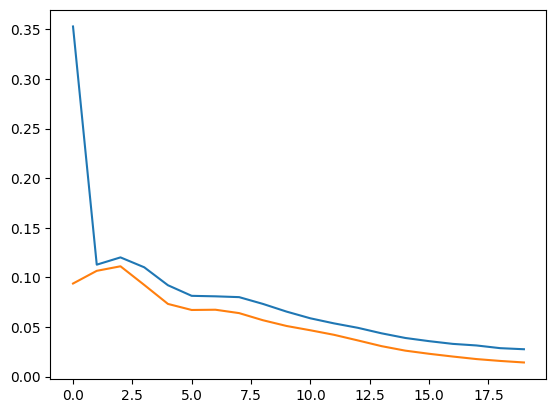

In [ ]:
plt.plot(losses)
plt.plot(val_losses);

In [ ]:
len(losses)

20

In [ ]:
# biểu đồ thể hiện độ lỗi, độ lỗi trên tập dữ liệu
# độ lỗi càng thấp thì giá trị dự đoán càng gần với giá trị thực

# **Evaluation on Test set**

In [ ]:
test_losses, test_preds  = [], []
transformer.eval()
for (x, y) in test_dataset:
    S = x.shape[-2]
    y_pred, _ = transformer(x,
                            mask=create_look_ahead_mask(S))
    loss_test = torch.nn.MSELoss()(y_pred, y)  # (B,S)
    test_losses.append(loss_test.item())
    test_preds.append(y_pred.detach().cpu().numpy())
test_preds = np.vstack(test_preds)
np.mean(test_losses)

0.012352022342383862

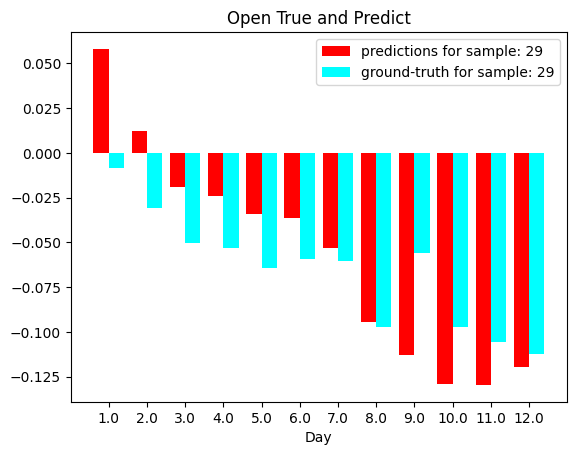

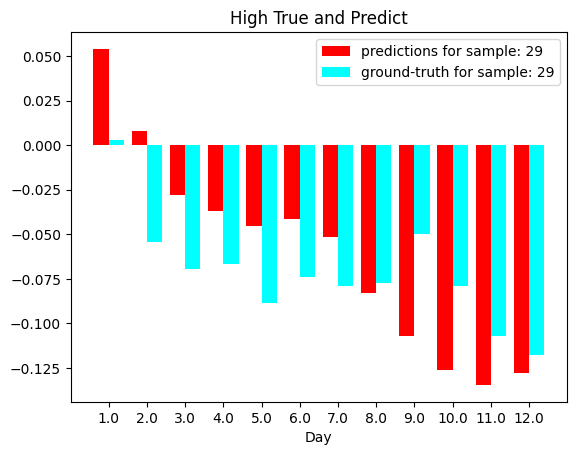

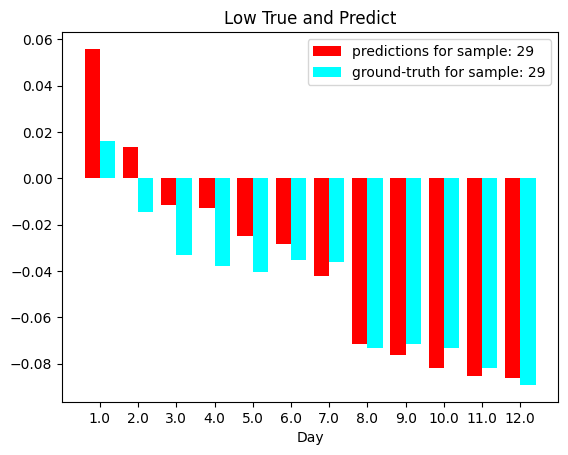

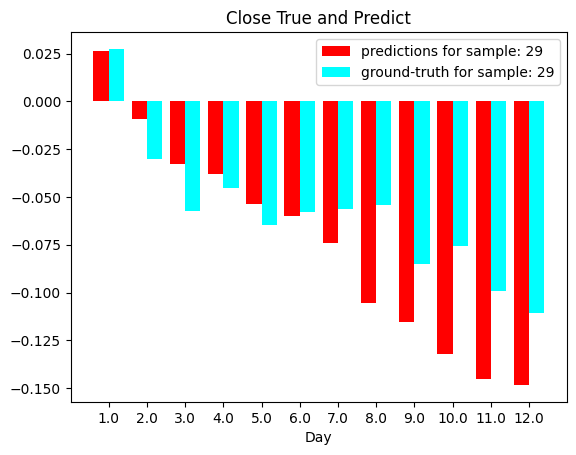

In [ ]:
# Display predictions vs ground truth:
# we'll take one random element of the first batch
# and display the first feature
seq_len = 12
index = 29
Tittle = ['Open True and Predict',
          'High True and Predict',
          'Low True and Predict',
          'Close True and Predict']

for feature_num in range(4):
  x_test, _ = test_dataset.dataset.tensors
  x_test = x_test[index, :, feature_num].cpu().numpy()
  pred = test_preds[index, :, feature_num]
  x = np.linspace(1, seq_len, seq_len)
  fig = plt.figure()
  # ax = plt.gca()
  # ax.invert_yaxis()
  X_axis = np.arange(len(pred))

  plt.bar(X_axis-0.2, pred, color='red', width=0.4, label='predictions for sample: {}'.format(index))
  plt.bar(X_axis+0.2, x_test, color='cyan', width=0.4, label='ground-truth for sample: {}'.format(index))

  plt.xticks(X_axis, x)
  plt.xlabel("Day")
  # plt.plot(x, pred, color='red', lw=3, label='predictions for sample: {}'.format(index))
  # plt.plot(x, x_test, color='cyan', lw=3, label='ground-truth for sample: {}'.format(index))
  plt.title(Tittle[feature_num])
  plt.legend(fontsize=10)

plt.show()

Hiện tại biểu đồ thể hiện giá trị dự đoán so với giá trị thực tế/
kết quả cho thấy giá trị dự đoán và giá trị thực tế k quá cách biệt nhau

Do bước xử lí dữ liệu có bước chuẩn hóa dữ liệu, do chưa chuyển đổi số nên âm
cột ngang:

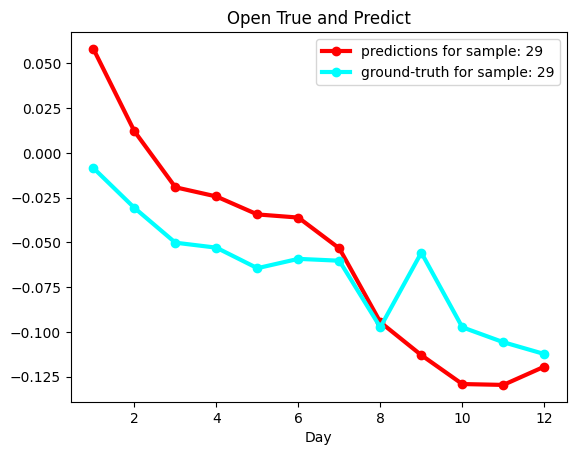

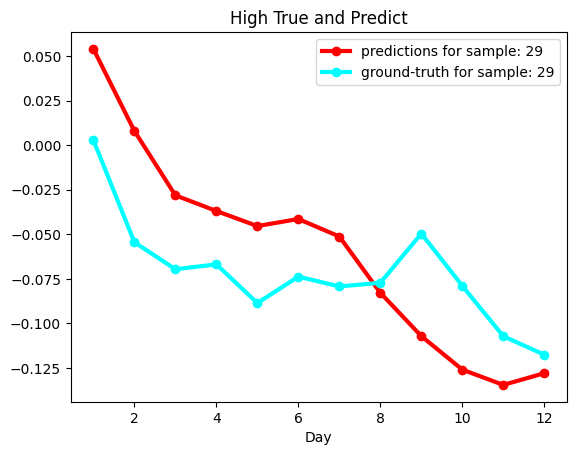

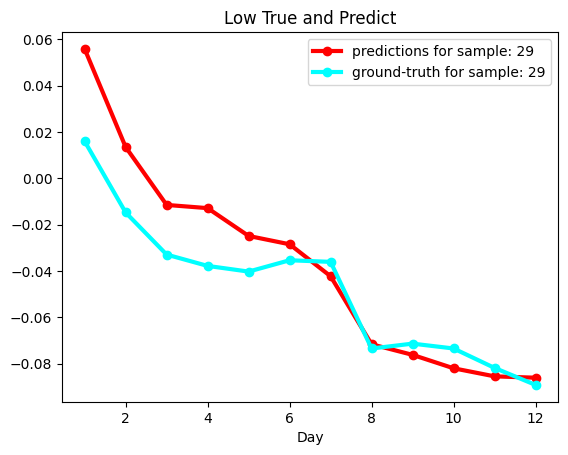

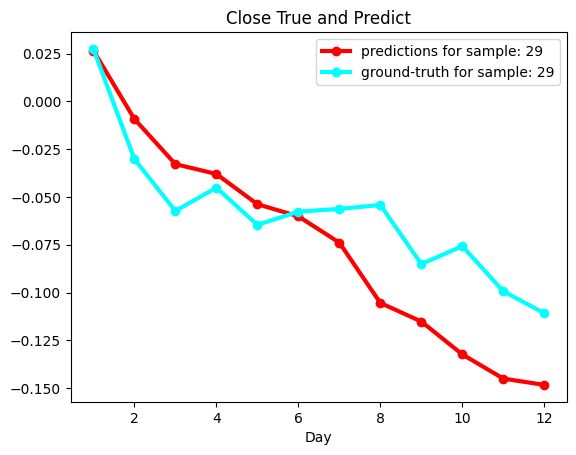

In [ ]:
# Display predictions vs ground truth:
# we'll take one random element of the first batch
# and display the first feature
seq_len = 12
index = 29
Tittle = ['Open True and Predict',
          'High True and Predict',
          'Low True and Predict',
          'Close True and Predict']

for feature_num in range(4):
  x_test, _ = test_dataset.dataset.tensors
  x_test = x_test[index, :, feature_num].cpu().numpy()
  pred = test_preds[index, :, feature_num]
  x = np.linspace(1, seq_len, seq_len)
  fig = plt.figure()

  plt.xlabel("Day")
  plt.plot(x, pred, marker='o', color='red', lw=3, label='predictions for sample: {}'.format(index))
  plt.plot(x, x_test, marker='o', color='cyan', lw=3, label='ground-truth for sample: {}'.format(index))
  plt.title(Tittle[feature_num])
  plt.legend(fontsize=10)

plt.show()

# **Running predict 12 days after 31-03-2023**

## **Get last 12 days before 31-03-2023**

In [ ]:
data_copied = data.copy()
data_12days_nearest = data_copied[len(data_copied)-12:]
data_12days_nearest

array([[1278.9, 1297.3, 1273.8, 1294.2],
       [1256.1, 1279.7, 1256.1, 1276.9],
       [1231.5, 1265. , 1227.3, 1264.7],
       [1229.6, 1243.8, 1225.6, 1234.4],
       [1239.2, 1239.3, 1230.3, 1234.3],
       [1224.2, 1234.4, 1219.1, 1232.7],
       [1211.1, 1220.2, 1210.3, 1216. ],
       [1207. , 1215.7, 1206.3, 1208.4],
       [1219.2, 1219.2, 1210.6, 1210.6],
       [1203.5, 1220. , 1203.5, 1219.3],
       [1180.3, 1206.9, 1180.1, 1203.9],
       [1184. , 1194.5, 1169.5, 1186. ]], dtype=float32)

In [ ]:
# Normalize dataset for running
# stats là biến status, lưu trữ giá trị dùng cho việc Normalize và Denormalize
data_mean = stats[0]
data_std = stats[1]
data_12days_nearest = (data_12days_nearest - data_mean) / data_std
data_12days_nearest = np.array([data_12days_nearest])
data_12days_nearest

array([[[-0.73720235, -0.69319373, -0.73542815, -0.6840362 ],
        [-0.8163984 , -0.7538957 , -0.7973213 , -0.7441032 ],
        [-0.90184647, -0.80459523, -0.89802825, -0.7864631 ],
        [-0.90844625, -0.87771297, -0.903973  , -0.89166737],
        [-0.8751007 , -0.89323324, -0.8875379 , -0.89201444],
        [-0.92720324, -0.91013324, -0.926702  , -0.8975702 ],
        [-0.9727061 , -0.95910865, -0.9574734 , -0.955554  ],
        [-0.98694736, -0.974629  , -0.9714605 , -0.9819419 ],
        [-0.9445708 , -0.9625576 , -0.95642465, -0.9743034 ],
        [-0.9991046 , -0.9597983 , -0.98125166, -0.9440959 ],
        [-1.0796897 , -1.0049796 , -1.0630764 , -0.9975663 ],
        [-1.0668379 , -1.0477467 , -1.1001421 , -1.0597169 ]]],
      dtype=float32)

## **Running predict Open, High, Low, Close for 12 days after 31-03-2023**

In [ ]:
pred_future = np.array([[None, None, None, None]], dtype=np.float32)
data_12days_nearest_copy = data_12days_nearest.copy()

for step in range(12):
  input = torch.tensor(data_12days_nearest_copy, device=device)
  input = torch.utils.data.TensorDataset(input)
  input = torch.utils.data.DataLoader(input)

  S = input.dataset.tensors[0].shape[-2]
  y_pred, _ = transformer(input.dataset.tensors[0],
                          mask=create_look_ahead_mask(S))
  y_pred = np.array([y_pred.detach().cpu().numpy()[0][-1]])

  pred_future = np.append(pred_future, y_pred, axis=0)

  data_12days_nearest_copy = data_12days_nearest_copy[0][1:]
  data_12days_nearest_copy = np.append(data_12days_nearest_copy, y_pred, axis=0)
  data_12days_nearest_copy = np.array([data_12days_nearest_copy])

pred_future = pred_future[1:]
pred_future

array([[-0.948862  , -0.93717283, -0.9437874 , -0.9472035 ],
       [-0.94329196, -0.9326269 , -0.93603295, -0.93611026],
       [-0.9550008 , -0.9433656 , -0.94955564, -0.9481524 ],
       [-0.9660514 , -0.9558304 , -0.96286684, -0.9622454 ],
       [-0.9692642 , -0.95807093, -0.9662578 , -0.96507245],
       [-0.9728165 , -0.9606719 , -0.9697743 , -0.96744317],
       [-0.9828846 , -0.972747  , -0.98056334, -0.97784543],
       [-0.98875207, -0.9780672 , -0.98567015, -0.98154306],
       [-0.9816677 , -0.96827954, -0.9776426 , -0.97353894],
       [-0.97534615, -0.96191794, -0.9721072 , -0.96899664],
       [-0.97661036, -0.9645919 , -0.974395  , -0.97209746],
       [-0.97744054, -0.9657617 , -0.9749943 , -0.9732108 ]],
      dtype=float32)

## **Visualization**

In [ ]:
data_copied = data.copy()
last_4_days_dataset = data_copied[len(data_copied)-4:]
last_4_days_dataset

array([[1219.2, 1219.2, 1210.6, 1210.6],
       [1203.5, 1220. , 1203.5, 1219.3],
       [1180.3, 1206.9, 1180.1, 1203.9],
       [1184. , 1194.5, 1169.5, 1186. ]], dtype=float32)

In [ ]:
data_mean = stats[0]
data_std = stats[1]
pred_future = pred_future * data_std +  data_mean
pred_future

array([[1217.9646, 1226.56  , 1214.214 , 1218.405 ],
       [1219.5681, 1227.8782, 1216.4315, 1221.6   ],
       [1216.1973, 1224.7645, 1212.5643, 1218.1317],
       [1213.0159, 1221.1504, 1208.7577, 1214.0728],
       [1212.0908, 1220.5009, 1207.7878, 1213.2585],
       [1211.0681, 1219.7467, 1206.7822, 1212.5758],
       [1208.1697, 1216.2456, 1203.6968, 1209.5798],
       [1206.4805, 1214.7031, 1202.2365, 1208.5149],
       [1208.52  , 1217.5409, 1204.5321, 1210.8202],
       [1210.3398, 1219.3855, 1206.1151, 1212.1284],
       [1209.976 , 1218.6101, 1205.4609, 1211.2354],
       [1209.7369, 1218.271 , 1205.2894, 1210.9147]], dtype=float32)

In [ ]:
X_old = [ '28/03/2023',
          '29/03/2023',
          '30/03/2023',
          '31/03/2023']

X_new = [ '31/03/2023',
          '01/04/2023',
          '02/04/2023',
          '03/04/2023',
          '04/04/2023',
          '05/04/2023',
          '06/04/2023',
          '07/04/2023',
          '08/04/2023',
          '09/04/2023',
          '10/04/2023',
          '11/04/2023',
          '12/04/2023']

In [ ]:
np.append(np.array([last_4_days_dataset[-1]]), pred_future, axis=0)

array([[1184.    , 1194.5   , 1169.5   , 1186.    ],
       [1217.9646, 1226.56  , 1214.214 , 1218.405 ],
       [1219.5681, 1227.8782, 1216.4315, 1221.6   ],
       [1216.1973, 1224.7645, 1212.5643, 1218.1317],
       [1213.0159, 1221.1504, 1208.7577, 1214.0728],
       [1212.0908, 1220.5009, 1207.7878, 1213.2585],
       [1211.0681, 1219.7467, 1206.7822, 1212.5758],
       [1208.1697, 1216.2456, 1203.6968, 1209.5798],
       [1206.4805, 1214.7031, 1202.2365, 1208.5149],
       [1208.52  , 1217.5409, 1204.5321, 1210.8202],
       [1210.3398, 1219.3855, 1206.1151, 1212.1284],
       [1209.976 , 1218.6101, 1205.4609, 1211.2354],
       [1209.7369, 1218.271 , 1205.2894, 1210.9147]], dtype=float32)

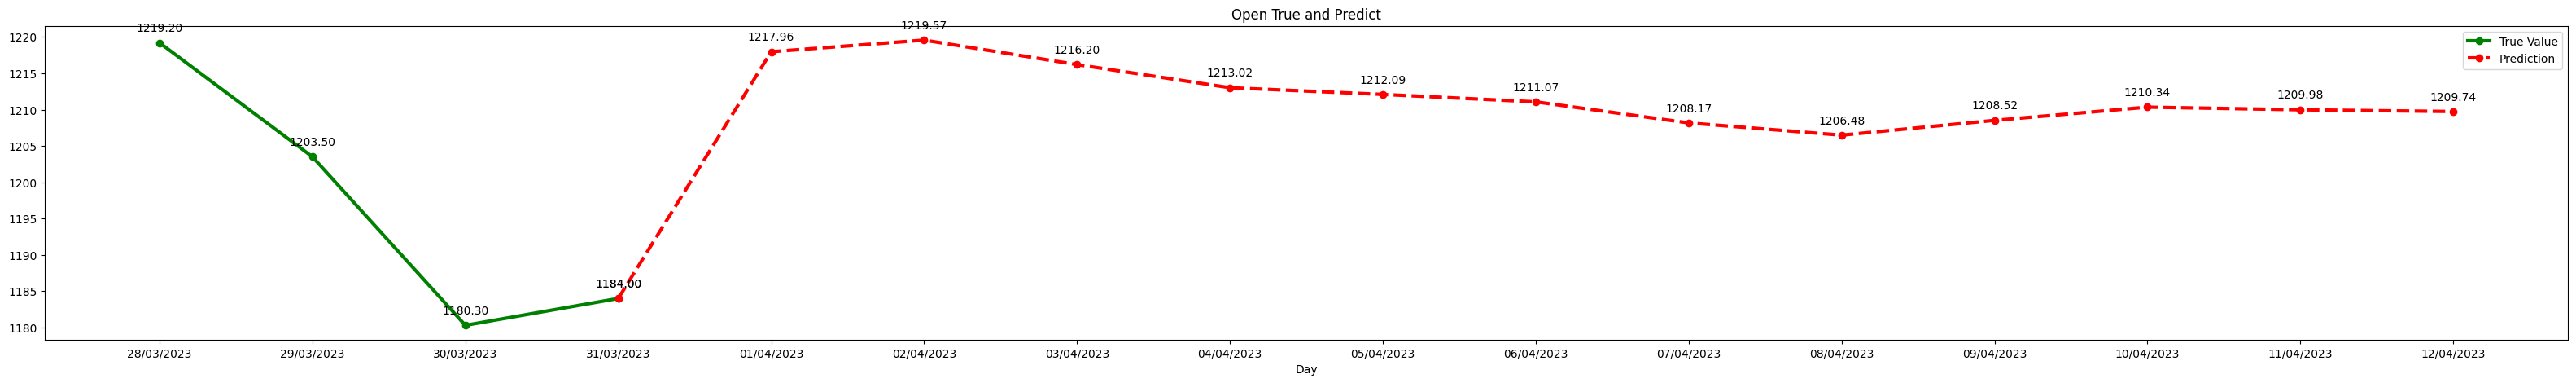

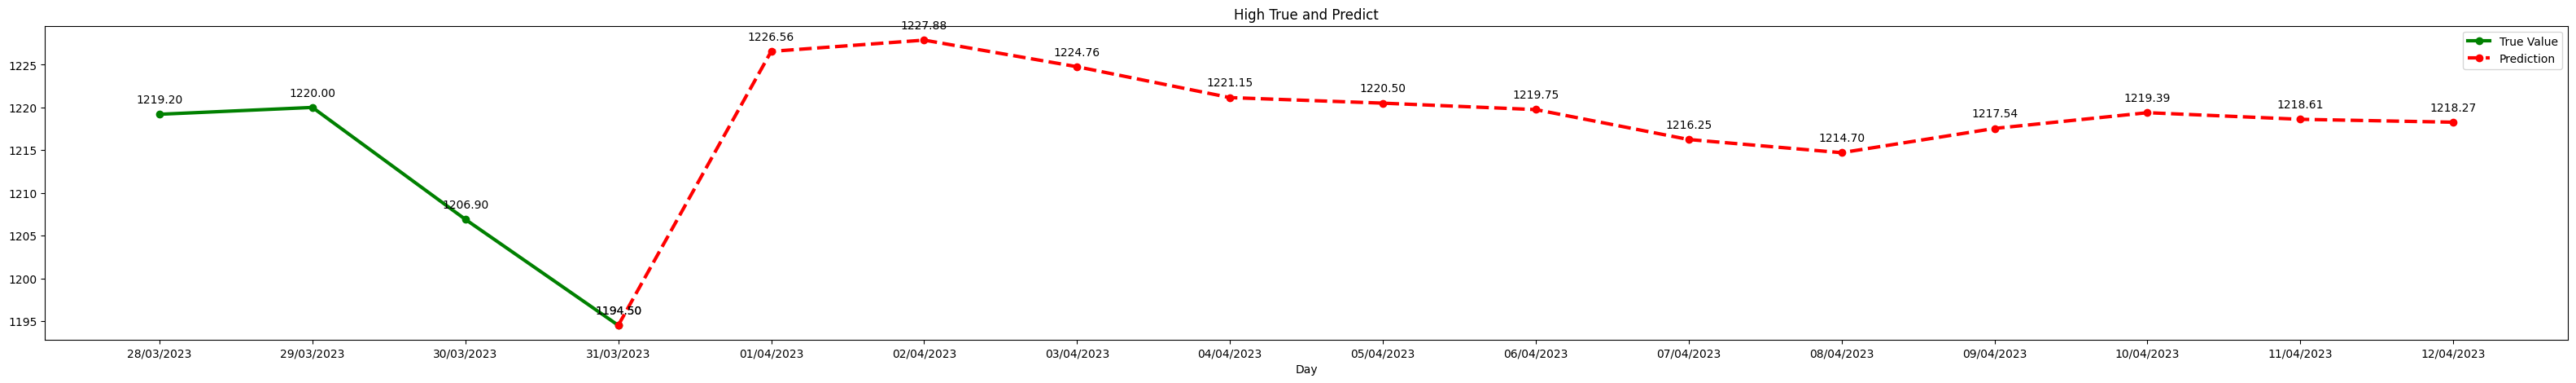

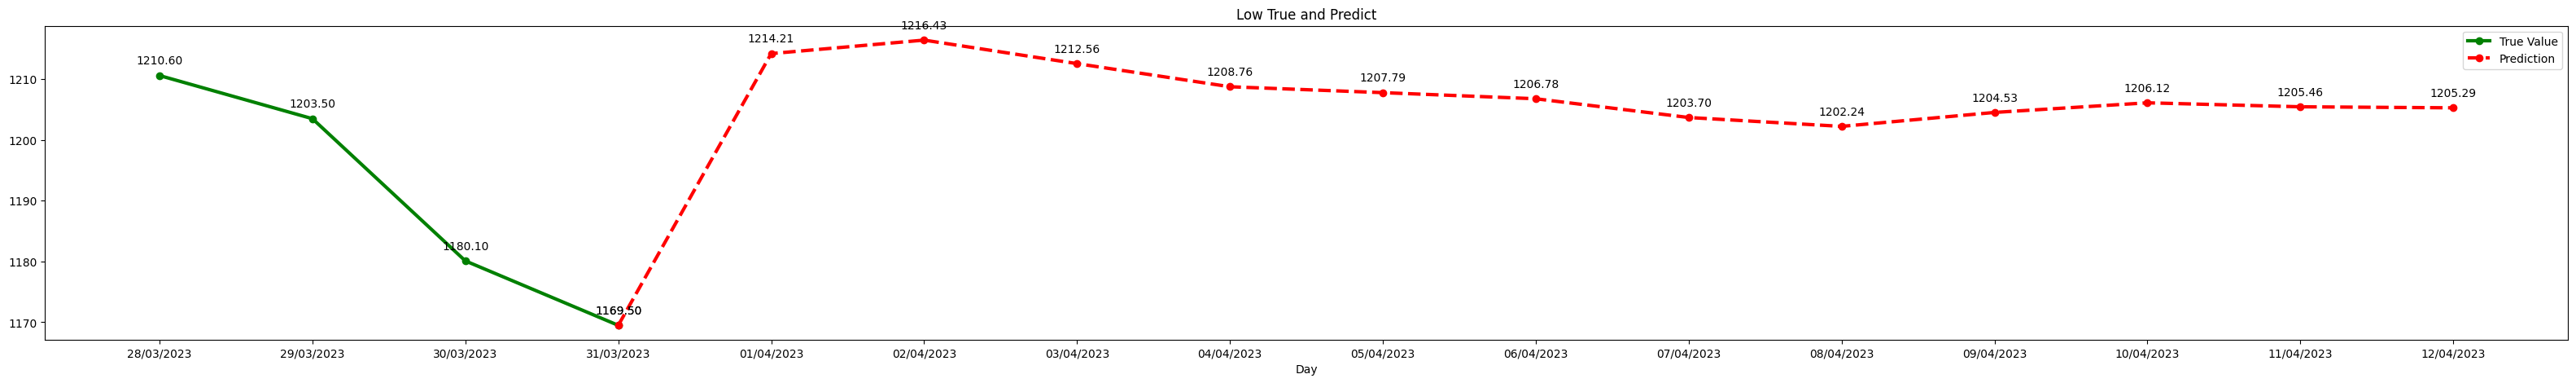

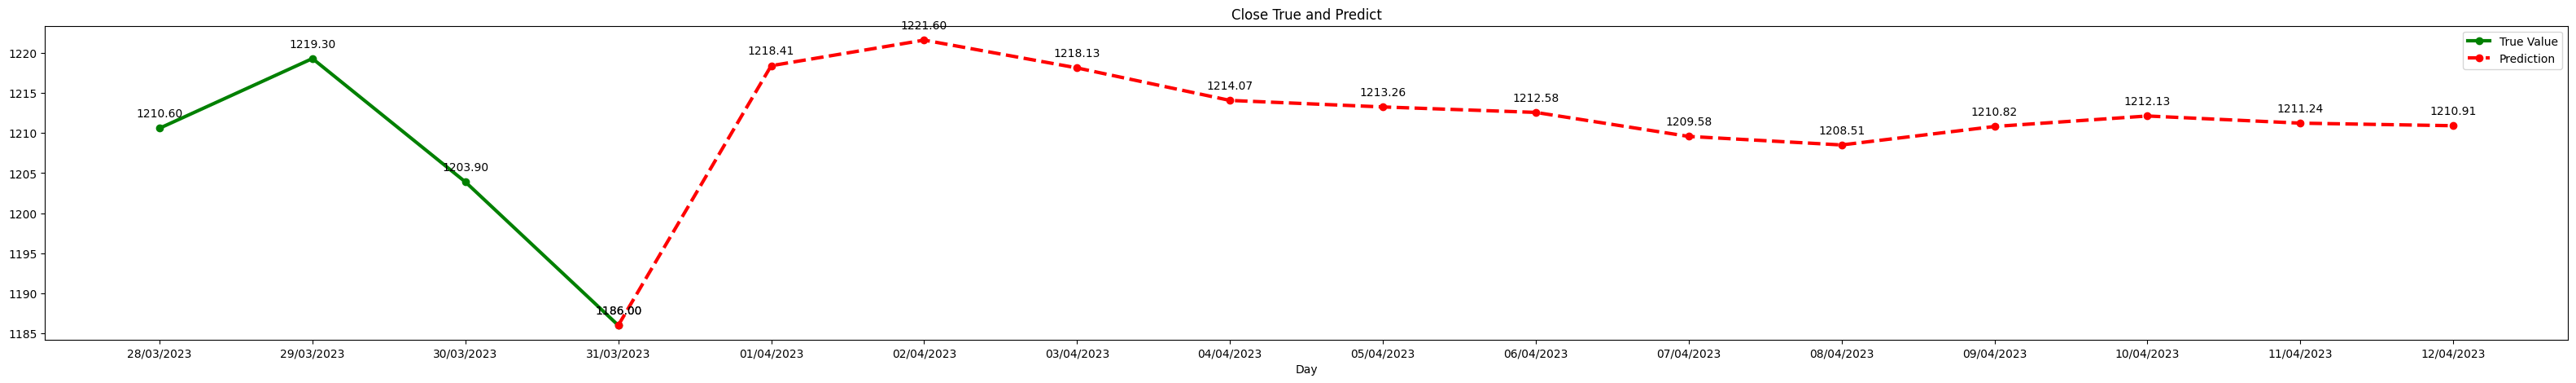

In [ ]:
Tittle = ['Open True and Predict',
          'High True and Predict',
          'Low True and Predict',
          'Close True and Predict']
pred_future_visual = np.append(np.array([last_4_days_dataset[-1]]), pred_future, axis=0)

for feature_num in range(4):
  x_test, _ = test_dataset.dataset.tensors
  x_test = x_test[index, :, feature_num].cpu().numpy()
  pred = pred_future_visual[:, feature_num]
  true_value = last_4_days_dataset[:, feature_num]
  fig = plt.figure(figsize=(40, 5))

  plt.xlabel("Day")
  plt.plot(X_old, true_value, marker='o', color='green', lw=3, label='True Value')
  plt.plot(X_new, pred, linestyle='--', marker='o', color='red', lw=3, label='Prediction')
  plt.title(Tittle[feature_num])
  plt.legend(fontsize=10)

  for x,y in zip(X_old, true_value):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
  for x,y in zip(X_new, pred):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                  (x,y), # these are the coordinates to position the label
                  textcoords="offset points", # how to position the text
                  xytext=(0,10), # distance from text to points (x,y)
                  ha='center') # horizontal alignment can be left, right or center

plt.show()

In [ ]:
df

,Open,High,Low,Close
Date,,,,
2023-07-07,1913.400024,1934.099976,1913.400024,1926.199951
2023-07-06,1909.300049,1910.199951,1903.199951,1908.699951
2023-07-05,1923.500000,1933.900024,1914.699951,1919.599976
2023-07-03,1917.900024,1929.500000,1917.900024,1921.699951
2023-06-30,1908.599976,1921.099976,1900.599976,1921.099976
...,...,...,...,...
2015-01-08,1207.000000,1215.699951,1206.300049,1208.400024
2015-01-07,1219.199951,1219.199951,1210.599976,1210.599976
2015-01-06,1203.500000,1220.000000,1203.500000,1219.300049


In [ ]:
!pip install dash
!pip install dash-core-components
!pip install dash-html-components
!pip install plotly
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 27.1 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import matplotlib.pyplot as plt

# Tạo DataFrame từ dữ liệu ban đầu và dữ liệu dự đoán
# Thay thế 'data' và 'pred_future_visual' bằng biến chứa dữ liệu tương ứng của bạn
df_data = pd.DataFrame(data, columns=['Open', 'High', 'Low', 'Close'])
df_pred = pd.DataFrame(pred_future_visual, columns=['Open', 'High', 'Low', 'Close'])

# Tạo ứng dụng Dash
app = dash.Dash(__name__)

# Định nghĩa giao diện người dùng
app.layout = html.Div(children=[
    html.H1(children='Gold Price Data and Prediction'),

    html.Div(children=[
        dcc.Graph(
            id='original-data-chart',
            figure={
                'data': [
                    {'x': df_data.index, 'y': df_data['Open'], 'name': 'Open'},
                    {'x': df_data.index, 'y': df_data['High'], 'name': 'High'},
                    {'x': df_data.index, 'y': df_data['Low'], 'name': 'Low'},
                    {'x': df_data.index, 'y': df_data['Close'], 'name': 'Close'}
                ],
                'layout': {
                    'title': 'Original Data',
                    'xaxis': {'title': 'Date'},
                    'yaxis': {'title': 'Price'}
                }
            }
        ),

        html.H1(children='Gold Price Prediction'),
        dcc.Graph(
            id='prediction-data-chart',
            figure={
                'data': [
                    {'x': df_pred.index, 'y': df_pred['Open'], 'name': 'Open'},
                    {'x': df_pred.index, 'y': df_pred['High'], 'name': 'High'},
                    {'x': df_pred.index, 'y': df_pred['Low'], 'name': 'Low'},
                    {'x': df_pred.index, 'y': df_pred['Close'], 'name': 'Close'}
                ],
                'layout': {
                    'title': 'Prediction Data',
                    'xaxis': {'title': 'Date'},
                    'yaxis': {'title': 'Price'}
                }
            }
        )
    ])
])

# Chạy ứng dụng Dash
if __name__ == '__main__':
    app.run_server(debug=True)


<ipython-input-47-906d0f776d80>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-47-906d0f776d80>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


<IPython.core.display.Javascript object>